### Visualize a function controlled by sliders
This notebook is an example of how a certain function can be studied my using the ipywidgets and matplotlib. In particular, the notebook shows how you can control the function parameters (`a`, `b`, ...) via sliders and this will change the shape of the function accordingly.

In [96]:
from collections import namedtuple
from functools import partial
from IPython.display import display
from ipywidgets import interactive

import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

Parameter=namedtuple('Parameter', ['name', 'min', 'max', 'step'])
XRange=namedtuple('XRange', ['min', 'max', 'points'])

# Notebook inputs
XRANGE = XRange(0, 100, 500)
PARAMETERS= (
    Parameter('a', 0, 3, 1),
    Parameter('b', 0, 10, 1)
)

# The function to evaluate
def myfunc(x, a, b):
    return np.sqrt(a*x) + a*x**2 + x**b

<IPython.core.display.Javascript object>


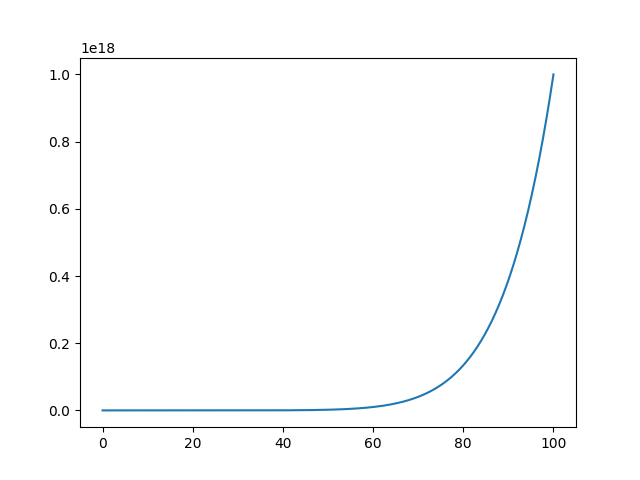

In [95]:
x = np.linspace(XRANGE.min, XRANGE.max, XRANGE.points)

myfunc_partial = partial(myfunc, x)
myfunc_partial.__name__ = 'myfunc'

box = interactive(myfunc_partial, **{par.name:(par.min, par.max, par.step) for par in PARAMETERS})
all_widgets = box.children
sliders = all_widgets[:-1]

fig, ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

def on_value_change(change):
    update_plot()

def update_plot():
    ax.clear()
    par_values = [s.value for s in sliders]
    ax.plot(x, myfunc_partial(*par_values))
    fig.canvas.draw()

for slider in sliders:
    slider.observe(on_value_change, names='value')

display(box)
update_plot()